In [ ]:
!pip install scikit-plot

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


##UTILITIES

In [ ]:
df= pd.read_csv("ravdess_train.csv")

In [ ]:
df=df.drop(["actor"],axis=1)
#df=df.drop(["filename"],axis=1)
#cancello temporaneamente actor

In [ ]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [ ]:
# Print Roc Curve
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp))
    print(roc_auc_score(y_test, y_tmp[:,1]))

In [ ]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [ ]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()

In [ ]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    for s in score:
        print("------- Score = " + str(s) +  "------- \n")

        k_fold = RepeatedKFold() # 5 split default, 10 repetitions default
        print("> Fold = " + str(k_fold) + "\n")

        clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = s, return_train_score=True)
        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        print("\n> Grid scores(validation):\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        print("\n> Grid scores(training):\n")

        means = clf.cv_results_['mean_train_score']
        stds = clf.cv_results_['std_train_score']

        print("...........RESULTS FOR TRAINING.........")
        print("........................................")



        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

        print("____________________________________________ END GRID SEARCH ____________________________________________")

        results[s] = best

    return results

In [ ]:
df.head()

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q25_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,-0.063106,-0.7693,0.553248,...,1.925561,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005
1,1,5,0,1,1,1,0.013950,-0.063106,-0.7693,0.770118,...,1.636015,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538
2,1,5,0,0,0,1,0.018855,-0.063106,-0.7693,0.851346,...,1.631947,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754
3,1,5,0,0,1,1,0.018087,-0.063106,-0.7693,1.562804,...,1.344538,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845
4,1,1,0,1,0,1,0.015921,-0.063106,-0.7693,0.286970,...,1.416930,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241


In [ ]:
df["Emotion"]

0       5
1       5
2       5
3       5
4       1
       ..
1823    7
1824    7
1825    7
1826    7
1827    7
Name: Emotion, Length: 1828, dtype: int64

In [ ]:
col=[x for x in df.columns if x!="Emotion"]
X = df[col].values
y = np.array(df['Emotion'])

In [ ]:
df

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q25_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.925561,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005
1,1,5,0,1,1,1,0.013950,-0.063106,-0.76930,0.770118,...,1.636015,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.631947,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.344538,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.416930,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,-0.063106,-0.74864,-0.713004,...,1.145129,1.296552,0.333745,-1.106246,-0.612427,-1.198817,0.647428,0.036057,1.054354,-1.526104
1824,1,7,1,1,0,0,-0.016770,-0.063106,-0.74864,-0.237333,...,0.744806,1.376251,0.352433,-0.901054,-0.871550,-1.198817,0.734806,0.036057,-0.389173,-0.504115
1825,1,7,1,1,1,0,-0.025751,-0.063106,-0.74864,-0.806583,...,0.764402,1.421183,1.039254,-1.106898,-0.894085,-0.618677,0.624605,0.036057,-0.130100,-0.454243
1826,1,7,1,0,0,0,-0.009914,-0.063106,-0.70732,-1.013416,...,0.782240,1.305472,-0.074024,-0.732249,-0.424644,-1.198817,0.343780,0.036057,0.072917,-1.058564


In [ ]:
from sklearn.decomposition import PCA

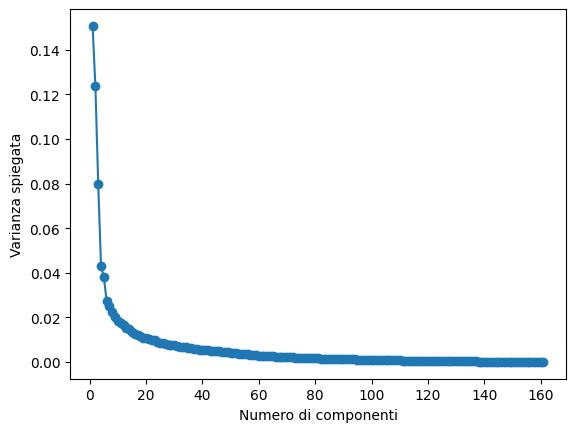

In [ ]:
pca = PCA()

# Addestra il modello sulla matrice dei dati
pca.fit(X)

# Estrae i valori di varianza spiegata
variance_ratio = pca.explained_variance_ratio_

# Crea un grafico per visualizzare i valori di varianza spiegata
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)

PROVO A SELEZIONARE LE K FEATURE MIGLIORI SECONDO L'ALGORITMO KBEST

In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
sel= SelectKBest(k=10)
X_train_sel= sel.fit_transform(X_train, y_train)

X_train_sel.shape

(1279, 10)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleziona le k=10 feature migliori utilizzando ANOVA F-value come metrica di selezione
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Ottieni l'array booleano delle feature selezionate
feature_mask = selector.get_support()

# Ottieni il nuovo dataset con solo le feature selezionate
X_new = X[:, feature_mask]




In [ ]:
# Ottieni l'elenco delle feature selezionate
selected_features = []
for i in range(len(feature_mask)):
    if feature_mask[i]:
        selected_features.append([i])
print("Le feature selezionate sono:", selected_features)


Le feature selezionate sono: [[16], [17], [76], [78], [84], [88], [100], [104], [106], [112]]


In [ ]:
df.columns.tolist()

['Vocal_channel_',
 'Emotion',
 'Emotional_intensity',
 'Statement',
 'Repetition',
 'Sex',
 'mean',
 'q50',
 'q75',
 'kur',
 'lag1_mean',
 'lag1_q75',
 'zc_q95',
 'zc_skew',
 'mfcc_q50',
 'mfcc_q75',
 'mfcc_q95',
 'mfcc_kur',
 'mfcc_skew',
 'sc_sum',
 'sc_max',
 'sc_q01',
 'sc_q05',
 'sc_q25',
 'sc_q50',
 'sc_q75',
 'sc_q99',
 'sc_kur',
 'sc_skew',
 'stft_sum',
 'stft_kur',
 'stft_skew',
 'mean_w1',
 'q50_w1',
 'q75_w1',
 'q95_w1',
 'kur_w1',
 'skew_w1',
 'lag1_mean_w1',
 'lag1_q75_w1',
 'lag1_q95_w1',
 'lag1_q99_w1',
 'lag1_kur_w1',
 'lag1_skew_w1',
 'zc_std_w1',
 'zc_q95_w1',
 'zc_q99_w1',
 'mfcc_sum_w1',
 'mfcc_max_w1',
 'mfcc_q01_w1',
 'mfcc_q05_w1',
 'mfcc_q25_w1',
 'mfcc_q75_w1',
 'mfcc_q95_w1',
 'mfcc_q99_w1',
 'mfcc_skew_w1',
 'sc_std_w1',
 'sc_q05_w1',
 'sc_q75_w1',
 'sc_q99_w1',
 'sc_kur_w1',
 'sc_skew_w1',
 'stft_q05_w1',
 'stft_q95_w1',
 'stft_q99_w1',
 'stft_kur_w1',
 'stft_skew_w1',
 'mean_w2',
 'q50_w2',
 'kur_w2',
 'skew_w2',
 'lag1_mean_w2',
 'lag1_q50_w2',
 'lag1_kur

*Target variable: Vocal_channel* k=10 best feature --> 'sc_q25', 'mfcc_sum_w1', 'zc_skew_w2','mfcc_q99_w2', 'sc_q99_w2', 'stft_skew_w3', 'mfcc_mean_w4', 'sc_std_w4','stft_sum_w4'


*Target Variable: Emotion* k=10 best features --> "Mfcc_q75", "Mfcc_q95", "Zc_q95_w2", "Mfcc_min_w2","Mfcc_q95_w2", "sc_q05_w2","Lag1_mean_w3", "Lag1_skew_w3","Zc_skew_w3","mfcc_q99_w3"

In [ ]:
sel.scores_

array([26.50225242, 13.91135885,  0.21468247,  0.18046597,  0.29496126,
        1.3154796 ,  5.30363334, 17.68894431, 11.54726811,  0.42029784,
       25.41952946, 20.14097233, 32.3710548 ,  4.19621805,  8.87532212,
       24.26147995, 95.73275168, 41.76530571, 10.17337966,  5.25196212,
        5.04972658,  8.02261739, 30.46460032, 17.05191253, 20.49862635,
        5.85210962, 20.2741441 , 20.47008655, 13.32953146,  5.48022448,
       11.36428849,  0.66153402,  1.21590163, 11.79436046,  5.42704586,
        4.73363257,  0.98200625,  0.98578212, 11.84753513, 10.2517586 ,
       24.54504575,  4.90348056,  4.16634687, 14.11142203, 10.93813239,
        8.99015997, 18.45038612, 14.26601423, 16.89071479,  5.10955445,
       11.5140875 ,  2.53903629,  7.11566965, 10.92921621,  8.07478808,
        3.40321846,  1.03524479,  3.31461842,  8.68712216,  5.03084655,
        3.83726479,  2.36173581,  1.23162053,  1.62961524,  9.67965239,
        1.02518126,  1.90779021,  3.13852008, 13.16871423, 12.10

In [ ]:
X_test_sel=sel.transform(X_test)
X_test_sel.shape

(549, 10)

In [ ]:
X_train_sel

array([[ 1.9656893 , -0.0725958 ,  2.20468716, ..., -0.19460009,
         0.99088124,  1.03817925],
       [-2.16405928,  2.34518409,  0.31612976, ...,  2.16582305,
        -0.49054578, -0.32049504],
       [-0.46458339, -0.26725369, -1.3637611 , ...,  2.09463662,
        -1.11326502, -0.74304819],
       ...,
       [-0.17393038,  0.04512426, -0.82618082, ..., -0.16521739,
        -0.22555306,  0.24925306],
       [-1.61828624,  1.81143454, -0.1520389 , ..., -0.52406335,
        -0.73823545, -0.2560368 ],
       [-1.06202849,  0.76755738, -0.96146715, ...,  0.7640549 ,
        -1.17283564, -0.4116171 ]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## AUTOMATIC BOX PLOT


In [ ]:
attributes=["mfcc_q75", "mfcc_q95", "zc_q95_w2", "mfcc_min_w2","mfcc_q95_w2", "sc_q05_w2","lag1_mean_w3", "lag1_skew_w3","zc_skew_w3","mfcc_q99_w3"]

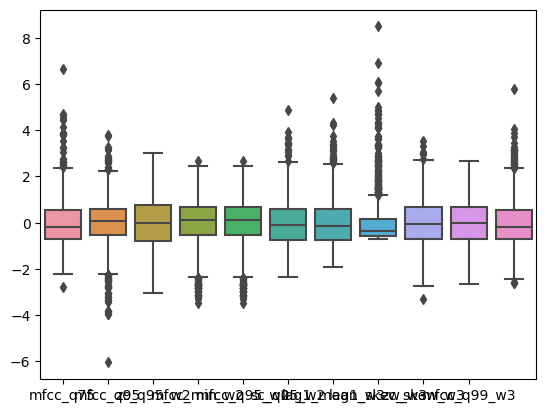

In [ ]:
sns.boxplot(data=[X_train_sel[:,0], X_train_sel[:,1], X_train_sel[:,2], X_train_sel[:,3], X_train_sel[:,3], X_train_sel[:,4]
                  , X_train_sel[:,5], X_train_sel[:,6], X_train_sel[:,7], X_train_sel[:,8], X_train_sel[:,9]])
plt.xticks([0,1,2,3,4,5,6,7,8,9], [attributes[0], attributes[1], attributes[2], attributes[3], attributes[4], attributes[5], attributes[6], attributes[7], attributes[8], attributes[9]])
plt.show()




In [ ]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)


print(is_outlier(X_train_sel[5]))
print(is_outlier(X_train_sel[6]))
print(is_outlier(X_train_sel[7]))
print(is_outlier(X_train_sel[8]))
print(is_outlier(X_train_sel[9]))
#quindi è opportuno inserire il nome di una variabile come sopra, per ottenere
#un array di vero o falso che consenta poi di definire se dei punti
#nell'array sono definiti outliers

[False False False False False False False False False False]
[False False False False False  True False False False False]
[False  True False False False False False False False False]
[False False False False False False False False False False]
[False False False False False False False False False False]


In [ ]:
boxplot= is_outlier(X_train_sel[7])
np.unique(boxplot, return_counts=True)
df.loc[np.where(boxplot==False)]

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q25_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.925561,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.631947,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.344538,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.416930,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241
5,1,1,0,1,1,1,0.015924,-0.063106,-0.76930,1.240973,...,0.999111,1.370801,0.628694,-1.154592,0.311713,0.750664,0.807194,0.036057,3.065088,-1.964541
6,1,1,0,0,0,1,0.013021,-0.063106,-0.74864,-0.226400,...,1.462516,1.369881,0.269847,-0.837324,0.424098,1.417648,0.825511,0.036057,0.835460,-0.680758
7,1,1,0,0,1,1,0.011850,-0.063106,-0.74864,0.029338,...,1.346204,1.262700,0.547732,-0.942057,0.119295,1.470872,0.463800,0.036057,0.494609,-0.135864
8,1,1,1,1,0,1,0.008405,-0.063106,-0.74864,-0.126199,...,1.246248,1.338121,0.331234,-0.991491,0.521895,0.702293,0.968813,0.036057,1.794703,-1.480839
9,1,1,1,1,1,1,0.015609,-0.063106,-0.72798,0.604383,...,0.544212,1.313351,-0.354318,-0.508659,0.559092,0.146366,0.309055,0.036057,0.359926,-0.702635


In [ ]:
outliers_box_automatic = is_outlier(X[:,0], k=1.5)
np.unique(outliers_box_automatic, return_counts=True)
#qui viene passato X, quindi tutto l'array e risulta falso che ci siano degli outliers.
#risulta interessante capire se cambiando l'ordine della target succede
#qualcosa di diverso.

(array([False]), array([1828]))

##HBOS

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=6610977603a7d6b3a7da17c26feb456c699fa0d2cd4c9c425b59cf131d0e4511
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [ ]:
from pyod.models.hbos import HBOS
#score approaches GLOBALE perchè adopera le probabilità, in altre parole,
#PER OGNI SINGOLA FEATURE viene costruito un istogramma che definisce lo score
# di outliers che contiene nel senso che, vista la distribuzione ed impostata
#una sorta di threshold i record che sono presenti in minore frequenza sono
#definibili outliers(quindi quelli che si trovano sulla CODA della distribuzione)
# e come si definisce outliers? con la formula di sopra che è la sommatoria del
# logaritmo in base 2 di 1 su Hist(p) che altro non è che l’altezza del bins
#nell’istogramma di riferimento per ogni SINGOLA P che è il record che stiamo osservando.

In [ ]:
hbos=HBOS()
hbos.fit(X)
#tieni conto dei parametri sotto, con contamination andiamo ad indentificare lo
#1% di outliers nella nostra distribuzione, che poi identificherà una threshold

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [ ]:
hbos.decision_scores_

#I VALORI IN OUTPUT indica il valore di "decisione" associato a ciascuna osservazione
# eseguita in un set di dati, quanto più è grande allora vorra dire che quel record verrà
#associato alla classe 1, mentre minore è, vorrà dire che verrà associato alla classe
#0. In altra parole è una misura di confidenza del modello che stiamo adoperando
#circa una osservazione.

array([209.39159583, 178.14398409, 180.8240725 , ..., 192.27164876,
       162.87056843, 173.69414169])

In [ ]:
outliers_hbos= hbos.predict(X)
np.unique(outliers_hbos, return_counts=True)

#restituisce i valori contenuti in "outliers"(prima riga di questa sezione)
#e ci fa una conta(vedi output), quindi nella classe 0 abbiamo 1645 elementi quindi
#non outliers, mentre nella classe 1 ne abbiamo 183


(array([0, 1]), array([1645,  183]))

In [ ]:
df.loc[np.where(outliers_hbos==1)]

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q25_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,-0.063106,-0.769300,0.553248,...,1.925561,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005
8,1,1,1,1,0,1,0.008405,-0.063106,-0.748640,-0.126199,...,1.246248,1.338121,0.331234,-0.991491,0.521895,0.702293,0.968813,0.036057,1.794703,-1.480839
32,1,0,1,1,0,1,0.122441,-0.063106,0.449636,-0.081324,...,1.272156,1.295820,0.642741,-1.069061,1.356861,0.965350,0.742675,0.036057,0.617787,-0.704333
33,1,0,1,1,1,1,0.049174,-0.063106,2.019792,0.374258,...,0.066534,-1.822950,0.562474,-1.265647,-1.749511,-0.659545,-2.852897,0.036057,-0.156425,2.455323
34,1,0,1,0,0,1,0.126289,-0.063106,-0.066862,0.282645,...,0.027438,0.769285,0.751434,2.139785,-0.543409,-0.115359,-0.868659,0.036057,-0.642646,1.163343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,0,3,1,1,1,1,-2.527808,-0.063106,0.759535,0.288579,...,-0.689523,-0.065800,-0.392101,1.113475,-1.311644,-0.750044,-1.356892,0.036057,-0.796548,1.772191
1766,0,3,1,0,0,1,11.108706,5.302404,3.404007,0.543482,...,-1.789990,-0.764689,0.679042,2.369758,3.003368,0.797889,1.694350,0.036057,1.835939,-2.074678
1801,1,0,1,1,1,0,0.007545,-0.063106,-0.727980,-0.173535,...,1.201511,1.123279,1.382271,-0.879147,-1.487875,0.105178,-1.776827,0.036057,-0.338190,2.095549
1816,1,2,1,1,0,0,-0.004384,-0.063106,-0.666000,1.839786,...,-0.189522,1.301035,0.156404,2.269118,-1.168354,-0.972590,-1.709169,0.036057,-0.769161,1.697940


In [ ]:
outliers_hbos

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The threshold for the defined comtanimation rate:" , hbos.threshold_)

The threshold for the defined comtanimation rate: 199.63408786310868


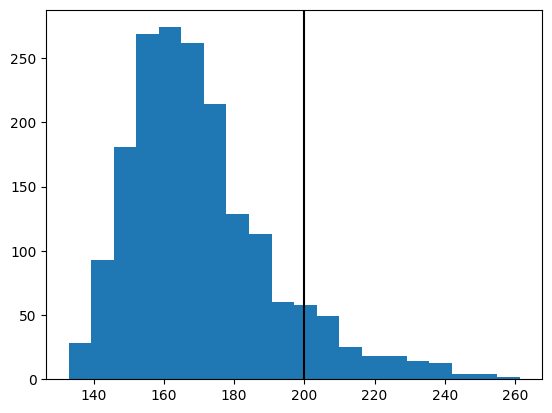

In [ ]:
plt.hist(hbos.decision_scores_, bins=20)
plt.axvline(np.min(hbos.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()
#l'istogramma creato con i valori di decisioni enunciati prima
#poi crea questa linea nera che delimita i valori associati
#alla classe 0 ed alla classe 1, quelli a sinistra sono tutti elementi
#associati alla classe 1(di fatto nella seconda riga del codice si
#puo leggere come si imposti la condizione che "outliers" sia uguale a 1)

##ELLIPTIC ENVELOPE



il professore consigli di applicare prima una tecnica di dimensionality reduction tipo pca o t-sne e testare l'algo su quel dataset ridimensionato, elliptic così funziona meglio

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA

provo a ridurre la dimensionalità con t-sne

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X)
X_tsne.shape

(1828, 2)

In [ ]:
ellenv=EllipticEnvelope(random_state=1)
ellenv.fit(X_tsne)
#label approaches

EllipticEnvelope(random_state=1)

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
outliers_ellenv=ellenv.predict(X_tsne)

In [ ]:
np.unique(outliers_ellenv,return_counts=True)

(array([-1,  1]), array([ 183, 1645]))

In [ ]:
df.loc[np.where(outliers_ellenv==-1)]

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q25_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
60,0,5,0,1,0,1,0.148730,-0.063106,-0.521381,-1.026847,...,0.526136,1.363130,-0.117859,-0.578256,0.354208,-1.069073,0.603855,0.036057,-0.116288,-0.696788
61,0,5,0,1,1,1,-0.534038,-0.063106,-0.356101,-0.800329,...,-1.532089,1.295370,-0.776301,0.390318,-1.286540,-1.198817,-0.137669,0.036057,-1.338890,0.529774
62,0,5,0,0,0,1,-0.144629,-0.063106,-0.480061,-1.025228,...,0.012217,1.387312,-0.348373,-0.431933,0.483677,-0.914082,0.548129,0.036057,0.316033,-1.073854
63,0,5,0,0,1,1,-0.201271,-0.063106,-0.500721,-1.186090,...,-0.286300,1.386287,-0.363907,-0.333152,0.374148,-0.685278,0.332220,0.036057,0.478088,-0.923862
64,0,1,0,1,0,1,-0.418977,-0.063106,-0.294122,-1.197058,...,-0.711396,1.408286,-0.498139,-0.280626,0.972159,-0.831244,0.635335,0.036057,0.241526,-1.091195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,0,6,0,1,0,1,-0.070116,-0.063106,2.185071,-0.484550,...,-0.806790,-0.839495,-0.447285,0.727125,2.142882,-0.298667,0.634174,0.036057,-0.606557,0.113588
1745,0,6,0,1,1,1,-0.228333,-0.063106,1.668573,-0.967934,...,-0.694687,-1.621494,-0.255795,-0.131869,1.537783,-0.279352,0.354919,0.036057,-0.641993,0.305829
1761,0,3,0,1,1,1,-0.307887,-0.063106,0.821515,0.657319,...,-1.225425,-1.430944,-0.146774,1.100890,0.806416,-0.613641,0.753324,0.036057,-1.336977,0.818319
1764,0,3,1,1,0,1,1.974963,-0.063106,0.552936,-0.224656,...,-1.069078,-0.632206,-0.492625,1.344499,-0.375735,0.336983,-0.893225,0.036057,-0.491015,1.321456


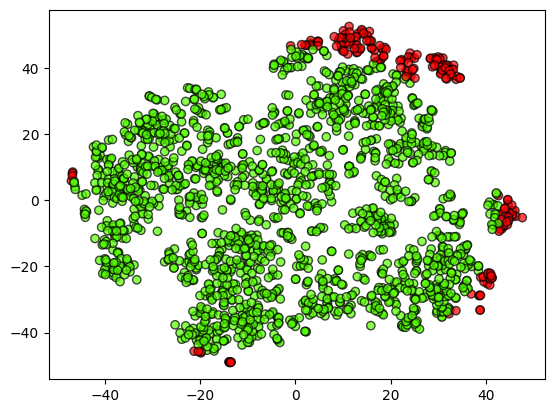

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=outliers_ellenv, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##kNN

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN



/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervise

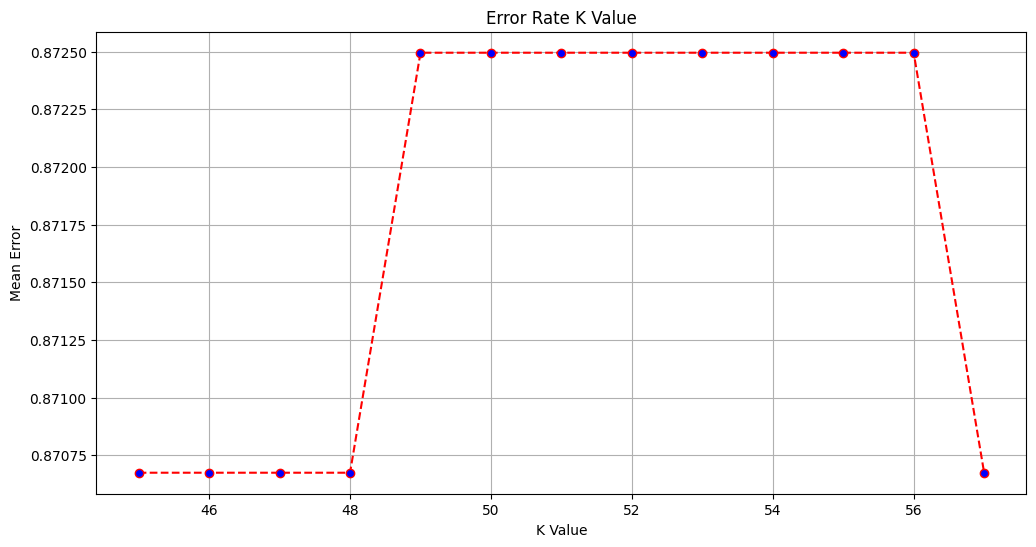

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(45,58):
    knn = KNN(n_neighbors=i, method="largest", metric= "euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(45,58), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

In [ ]:
clf=KNN(n_neighbors=47)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=47, p=2,
  radius=1.0)

In [ ]:
clf.decision_scores_


array([25.51944198, 10.95142993, 12.17952048, ..., 13.68489076,
       11.46746613, 12.13593465])

In [ ]:
anomlay_score = clf.decision_function(X)


In [ ]:
outliers_knn=clf.predict(X)
np.unique(outliers_knn, return_counts=True)

(array([0, 1]), array([1647,  181]))

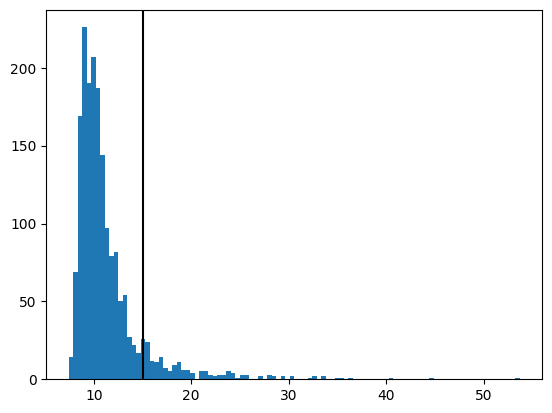

In [ ]:
plt.hist(clf.decision_scores_, bins=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c='k')
plt.show()

In [ ]:
np.mean(anomlay_score[np.where(outliers_knn==1)])


20.168523799927392

In [ ]:
np.mean(anomlay_score)


11.30964321593089

In [ ]:
knn.threshold_

AttributeError: ignored

In [ ]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])


In [ ]:
plt.hist(clf.decision_scores_, bin=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c="k")
plt.show()

In [ ]:
df['outliers_knn'] = 1
for i in np.where(outliers_knn==-1):
    df['outliers_knn'][i] = 0

<ipython-input-40-8d5e42aa0f66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers_knn'][i] = 0


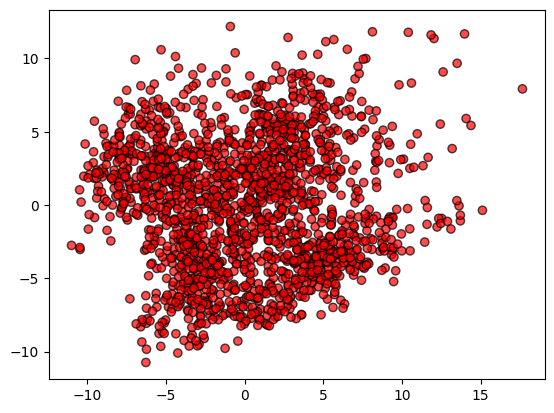

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers_knn'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

<ipython-input-42-38b58b3b8cea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers'][i] = 1


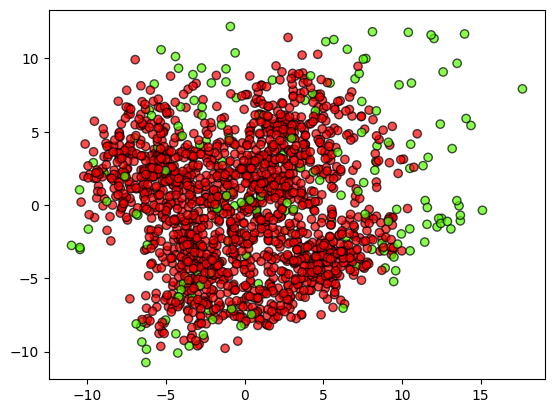

In [ ]:
df['outliers'] = 0
for i in np.where(outliers_knn==1):
    df['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##KNN CON GRID SEARCH PER IPOSTARE IL K MIGLIORE

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(1279, 65)

In [ ]:
X_test_sel = sel.transform(X_test)

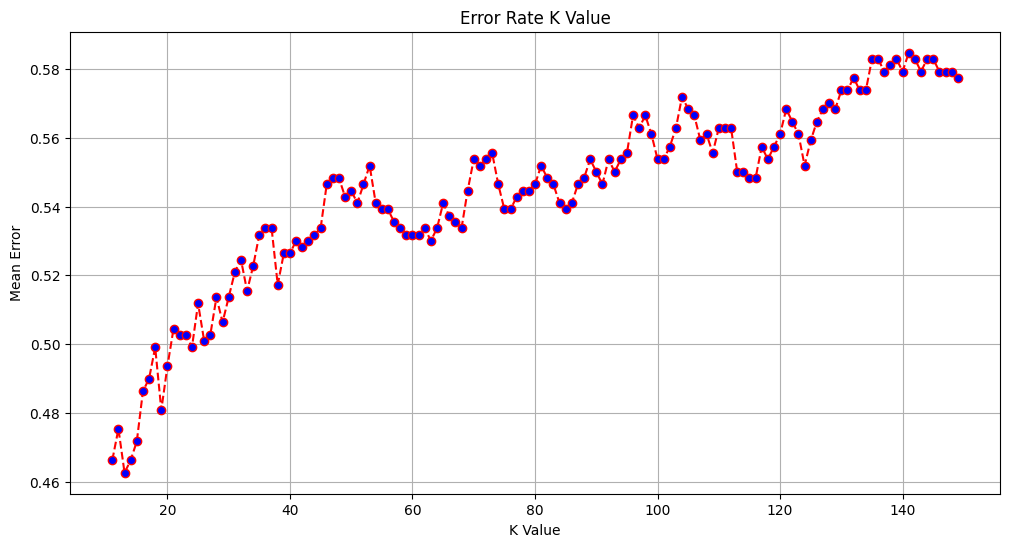

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(11,150):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', p=2)
    knn.fit(X_train_sel, y_train)
    pred_i = knn.predict(X_test_sel)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(11,150), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

In [ ]:
learner = KNN(n_neighbors= 17, metric= 'manhattan')
learner.fit(X_train_sel)
#predictions = classifier.predict(X_test)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='manhattan', metric_params=None, n_jobs=1, n_neighbors=17, p=2,
  radius=1.0)

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>11, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>12, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>13, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>14, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>15, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>16, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>17, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>18, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>19, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>20, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>21, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>22, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>23, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>24, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>25, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>26, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>27, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>28, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>29, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>30, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>31, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>32, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>33, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>34, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>35, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>36, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>37, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>38, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>39, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>40, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>41, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>42, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>43, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>44, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>45, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>46, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>47, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>48, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>49, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>50, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>51, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>52, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>53, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>54, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>55, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>56, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>57, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>58, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>59, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>60, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>61, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>62, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>63, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>64, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>65, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>66, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>67, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>68, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>69, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>70, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>71, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>72, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>73, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>74, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>75, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>76, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>77, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>78, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>79, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>80, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>81, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>82, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>83, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>84, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>85, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>86, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>87, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>88, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>89, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>90, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>91, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>92, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>93, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>94, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>95, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>96, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>97, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>98, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>99, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>100, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>101, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>102, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>103, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>104, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>105, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>106, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>107, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>108, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>109, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>110, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>111, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>112, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>113, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>114, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>115, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>116, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>117, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>118, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>119, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>120, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>121, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>122, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>123, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>124, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>125, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>126, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>127, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>128, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>129, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>130, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>131, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>132, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>133, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>134, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>135, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>136, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>137, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>138, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>139, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>140, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>141, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>142, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>143, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>144, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>145, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>146, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>147, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>148, train: 0.131, test: 0.118


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


>149, train: 0.131, test: 0.118


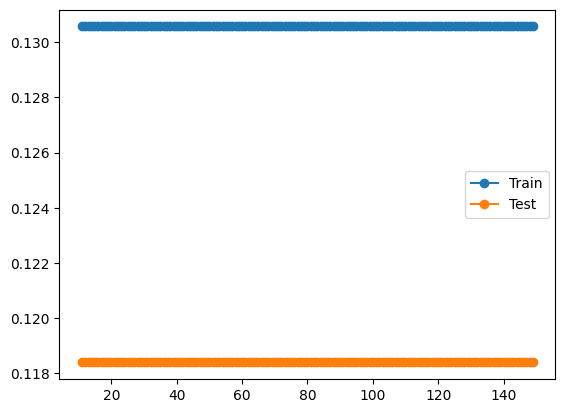

In [ ]:
from matplotlib import pyplot
train_scores, test_scores = list(), list()
values = [i for i in range(11,150)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNN(n_neighbors=17)
 # fit model on the training dataset
 model.fit(X_train_sel, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train_sel)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test_sel)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>11, train: 0.605, test: 0.464
>12, train: 0.600, test: 0.470
>13, train: 0.578, test: 0.446
>14, train: 0.579, test: 0.450
>15, train: 0.579, test: 0.441
>16, train: 0.580, test: 0.452
>17, train: 0.572, test: 0.452
>18, train: 0.566, test: 0.432
>19, train: 0.557, test: 0.428
>20, train: 0.550, test: 0.437
>21, train: 0.553, test: 0.444
>22, train: 0.537, test: 0.421
>23, train: 0.531, test: 0.423
>24, train: 0.535, test: 0.419
>25, train: 0.536, test: 0.419
>26, train: 0.518, test: 0.419
>27, train: 0.513, test: 0.423
>28, train: 0.509, test: 0.408
>29, train: 0.513, test: 0.404
>30, train: 0.512, test: 0.404
>31, train: 0.510, test: 0.412
>32, train: 0.501, test: 0.413
>33, train: 0.489, test: 0.410
>34, train: 0.491, test: 0.403
>35, train: 0.493, test: 0.408
>36, train: 0.491, test: 0.404
>37, train: 0.491, test: 0.406
>38, train: 0.490, test: 0.404
>39, train: 0.490, test: 0.408
>40, train: 0.482, test: 0.399
>41, train: 0.478, test: 0.393
>42, train: 0.479, test: 0.410
>43, tra

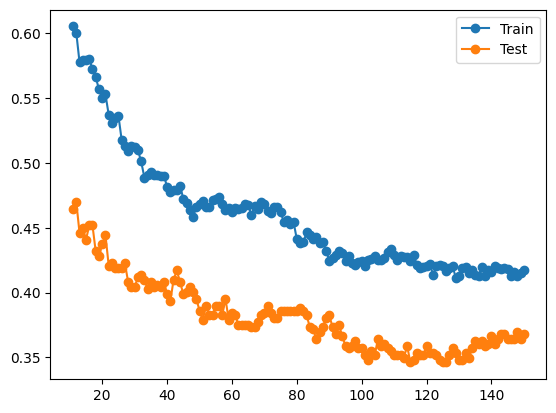

In [ ]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(11, 151)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
learner.decision_scores_


array([56.53026205, 41.62744934, 47.33523453, ..., 39.3961486 ,
       39.20275938, 31.37508373])

In [ ]:
learner.threshold_

47.74160636803754

In [ ]:
anomalay_score = learner.decision_function(X_train_sel)

In [ ]:
outliers_knn=learner.predict(X_train_sel)
np.unique(outliers_knn, return_counts=True)

(array([0, 1]), array([1155,  124]))

In [ ]:
np.mean(anomalay_score[np.where(outliers_knn==1)])


54.11307843963697

questo codice qui di sotto consente di valutare se il modello è in overfitting oppure no, se la confusion matrix del train performa bene a dispetto di quella di test, allora siamo in overfitting

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calcola l'accuratezza sul training set
y_train_pred = learner.predict(X_train_sel)
train_acc = accuracy_score(y_train, y_train_pred)

# calcola la matrice di confusione sul training set
train_conf = confusion_matrix(y_train, y_train_pred)

# calcola l'accuratezza sul test set
y_test_pred = learner.predict(X_test_sel)
test_acc = accuracy_score(y_test, y_test_pred)

# calcola la matrice di confusione sul test set
test_conf = confusion_matrix(y_test, y_test_pred)

# stampa i risultati
print("Training accuracy:", train_acc)
print("Training confusion matrix:\n", train_conf)
print("Test accuracy:", test_acc)
print("Test confusion matrix:\n", test_conf)


Training accuracy: 0.12822517591868648
Training confusion matrix:
 [[155  41   0   0   0   0   0   0]
 [187   9   0   0   0   0   0   0]
 [ 90  10   0   0   0   0   0   0]
 [164  32   0   0   0   0   0   0]
 [180  16   0   0   0   0   0   0]
 [ 96   2   0   0   0   0   0   0]
 [188   8   0   0   0   0   0   0]
 [ 95   6   0   0   0   0   0   0]]
Test accuracy: 0.11657559198542805
Test confusion matrix:
 [[61 23  0  0  0  0  0  0]
 [81  3  0  0  0  0  0  0]
 [36  8  0  0  0  0  0  0]
 [74 10  0  0  0  0  0  0]
 [78  6  0  0  0  0  0  0]
 [42  0  0  0  0  0  0  0]
 [77  7  0  0  0  0  0  0]
 [39  4  0  0  0  0  0  0]]


##LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
clf=LocalOutlierFactor(n_neighbors=400
                       , novelty=True)
clf.fit(X_train)
y_pred=clf.predict(X_test)
y_pred.shape

(549,)

In [ ]:
clf.negative_outlier_factor_


array([-0.99406477, -0.97200307, -2.22909078, ..., -0.98763501,
       -0.9781419 , -0.97593408])

In [ ]:
np.unique(y_pred,return_counts=True)

(array([-1,  1]), array([ 33, 516]))

In [ ]:
min_val=np.min(clf.negative_outlier_factor_[np.where(y_pred==-1)])


In [ ]:
np.mean(clf.negative_outlier_factor_[np.where(y_pred==-1)])


-1.0350310583475175

In [ ]:
max_val=np.max(clf.negative_outlier_factor_[np.where(y_pred==-1)])


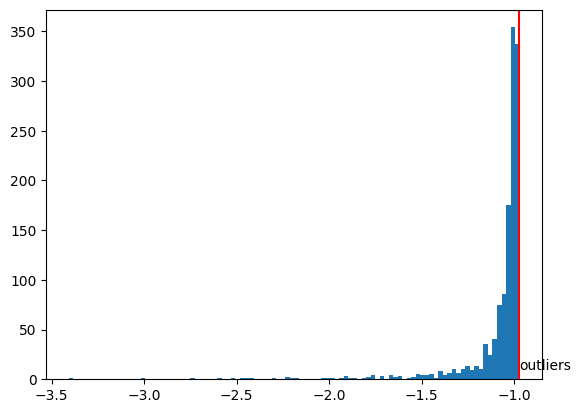

In [ ]:
plt.hist(clf.negative_outlier_factor_, bins=100)
plt.axvline(max_val, c='red')
plt.text(max_val, 10, 'outliers')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers_LOF'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_LOF, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X)

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=outliers_LOF, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso=Isomap(n_components=2)
X_iso=iso.fit_transform(X)
X_iso.shape

In [ ]:
plt.scatter(X_iso[:,0], X_iso[:,0],  c=outliers_LOF, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##PROVO A FARE LOF SULLE FEATURES TROVATE DAL K BEST DI PRIMA


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=20
                      )


In [ ]:
clf=LocalOutlierFactor(n_neighbors=20,
                      novelty=True)
clf.fit(X_train_sel)

y_pred=clf.predict(X_test_sel)

In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20)
outliers_k_lof = clf.fit_predict(X_train_sel)
np.unique(outliers_k_lof, return_counts=True)

In [ ]:
np.unique(outliers_k_lof, return_counts=True)

In [ ]:
np.where(outliers_k_lof==-1)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sel)
X_pca_sel = pca.transform(X_train_sel)

plt.scatter(X_pca_sel[:, 0], X_pca_sel[:, 1], c=outliers_klof, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##NEGATIVE OUTLIER DETECTION

In [ ]:
#clf.negative_outlier_factor_

In [ ]:
#np.unique(outliers_neg_lof, return_counts=True)

In [ ]:
#np.where(outliers_neg_lof==-1)

In [ ]:
#clf.negative_outlier_factor_[np.where(outliers_neg_lof==-1)]

In [ ]:
#np.max(clf.negative_outlier_factor_[np.where(outliers_neg_lof==-1)])


In [ ]:
#np.min(clf.negative_outlier_factor_[np.where(outliers_neg_lof==-1)])


In [ ]:
#plt.hist(clf.negative_outlier_factor_, bins=20)
#plt.axvline(np.min(clf.negative_outlier_factor_[np.where(outliers_neg_lof==1)]), c='k')
#plt.show()

In [ ]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#pca.fit(X)
#X_pca = pca.transform(X)

#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers_neg_lof'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

In [ ]:
#from sklearn.manifold import MDS
#mds = MDS(n_components=2, normalized_stress='auto') # shoudl run as sammon mapping
#X_train_mds = mds.fit_transform(X)
#X_train_mds.shape

In [ ]:
#plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=df['outliers_neg_lof'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

In [ ]:
#from sklearn.manifold import TSNE

In [ ]:
#tsne = TSNE(n_components=2)
#X_train_tsne = tsne.fit_transform(X_train)
#X_train_tsne.shape

In [ ]:
#plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=df['outliers_neg_lof'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

In [ ]:
#DA RAGIONARCI SU, SECONDO ME è SOLO UN ESEMPIO ILLUSTRATIVO

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.01)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth)#.sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
from pyod.models.lof import LOF

In [ ]:
#clf = LOF(n_neighbors=600)
#clf.fit(X)

In [ ]:
#outliers = clf.predict(X)
#np.unique(outliers, return_counts=True)

In [ ]:
#clf.negative_outlier_factor_

In [ ]:
#np.unique(outliers, return_counts=True)

In [ ]:
#plt.hist(clf.decision_scores_, bins=20)
#plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
#plt.show()

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

##COF

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyod.models.cof import COF

In [ ]:
clf=COF()
clf.fit(X)


COF(contamination=0.1, method='fast', n_neighbors=20)

In [ ]:
outliers_cof=clf.predict(X)
np.unique(outliers_cof,return_counts=True)

(array([0, 1]), array([1645,  183]))

Questo codice di sopra utilizza un classificatore (indicato con clf) per fare una previsione sui dati di input X. Il risultato delle previsioni viene quindi assegnato alla variabile outliers.

La funzione np.unique(outliers, return_counts=True) restituisce un array di valori unici presenti in outliers e il numero di volte in cui ciascun valore unico appare. Questo può essere utile per valutare quante istanze sono state predette come outliers dal classificatore.

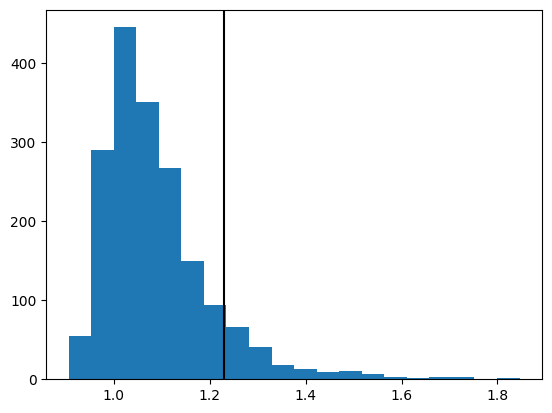

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_cof==1)]), c='k')
plt.show()

ValueError: ignored

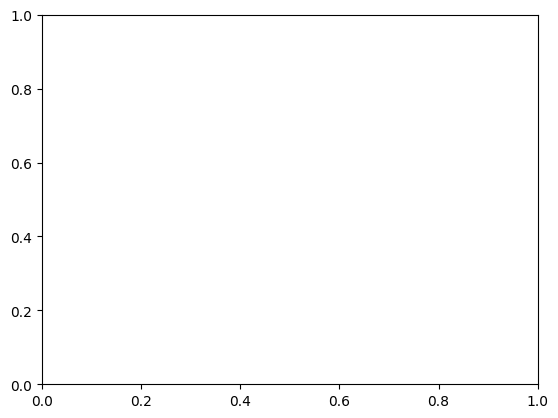

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca_cof = pca.transform(X_train)

plt.scatter(X_pca_cof[:, 0], X_pca_cof[:, 1], c=outliers_cof, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


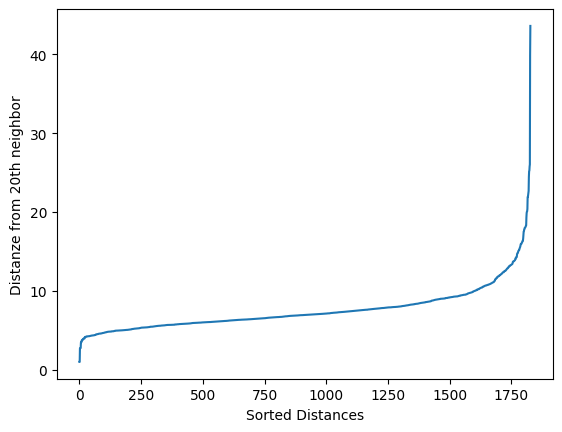

In [ ]:
#con questo vorrei provare a definire l'epsilon
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("Distanze from 20th neighbor")
plt.xlabel("Sorted Distances")
plt.plot(distances)

In [ ]:
dbscan=DBSCAN(eps=15, min_samples=163)
dbscan.fit(X)

DBSCAN(eps=15, min_samples=163)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([  83, 1745]))

In [ ]:
df['outliers'] = np.nan
df['label'] = dbscan.labels_
for i in range(0,len(df)):
    if df['label'][i] == -1:
        df['outliers'][i] = 1
    else:
        df['outliers'][i] = 0

<ipython-input-116-0d256d8ddad1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers'][i] = 1
<ipython-input-116-0d256d8ddad1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers'][i] = 0


In [ ]:
df.loc[np.where(dbscan.labels_==-1)]

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,outliers_knn,outliers,label
0,1,5,0,1,0,1,0.018034,-0.063106,-0.769300,0.553248,...,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005,1,1.0,-1
8,1,1,1,1,0,1,0.008405,-0.063106,-0.748640,-0.126199,...,-0.991491,0.521895,0.702293,0.968813,0.036057,1.794703,-1.480839,1,1.0,-1
33,1,0,1,1,1,1,0.049174,-0.063106,2.019792,0.374258,...,-1.265647,-1.749511,-0.659545,-2.852897,0.036057,-0.156425,2.455323,1,1.0,-1
35,1,0,1,0,1,1,-0.878017,-0.063106,1.234714,-0.220533,...,0.190569,-0.610597,-0.469785,-1.173455,0.036057,-0.699276,1.418410,1,1.0,-1
42,1,3,1,0,0,1,0.279885,-0.063106,0.552936,0.417530,...,1.278216,-0.980438,0.003651,-1.290610,0.036057,-0.522506,1.663952,1,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0,0,1,1,1,1,-2.060603,-0.063106,1.875172,-0.179510,...,1.575609,3.957156,2.185998,1.634390,0.036057,0.323461,-0.832711,1,1.0,-1
1758,0,0,1,0,0,1,-1.072230,-0.063106,4.808883,-0.289280,...,1.468776,5.445196,2.693704,1.742667,0.036057,2.108938,-1.554576,1,1.0,-1
1759,0,0,1,0,1,1,-1.203833,2.619649,3.982486,-0.254904,...,2.195810,4.540935,2.578377,1.768032,0.036057,0.709457,-1.081696,1,1.0,-1
1766,0,3,1,0,0,1,11.108706,5.302404,3.404007,0.543482,...,2.369758,3.003368,0.797889,1.694350,0.036057,1.835939,-2.074678,1,1.0,-1


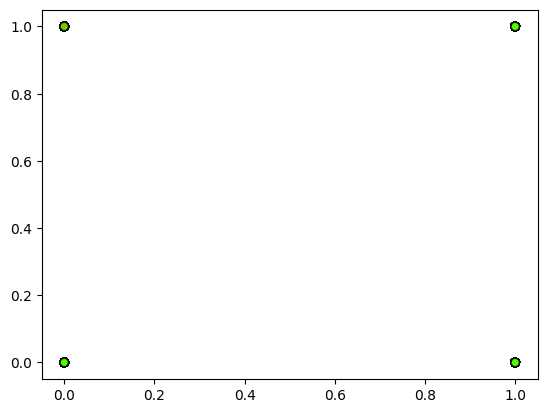

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

##CBLOF

In [ ]:
from numpy import where
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from pyod.models.cblof import CBLOF

In [ ]:
cblof=CBLOF()
cblof.fit(X_train_pca,y_train)


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [ ]:
outliers_cblof=cblof.predict(X_train_pca)
np.unique(outliers_cblof, return_counts=True)

(array([0, 1]), array([1151,  128]))

In [ ]:
anomly_score = cblof.decision_function(X_train_pca)

In [ ]:
np.mean(anomly_score[np.where(outliers_cblof==1)])

5.6496764182027945

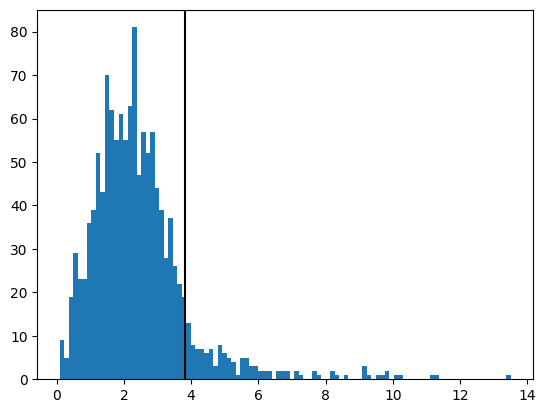

In [ ]:
plt.hist(cblof.decision_scores_, bins=100)
plt.axvline(np.min(cblof.decision_scores_[np.where(outliers_cblof==1)]), c='k')
plt.show()

In [ ]:
cblof.threshold_

3.820125373084634

In [ ]:
cblof.labels_

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
df.loc[np.where(outliers_cblof.labels_==1)]

AttributeError: ignored

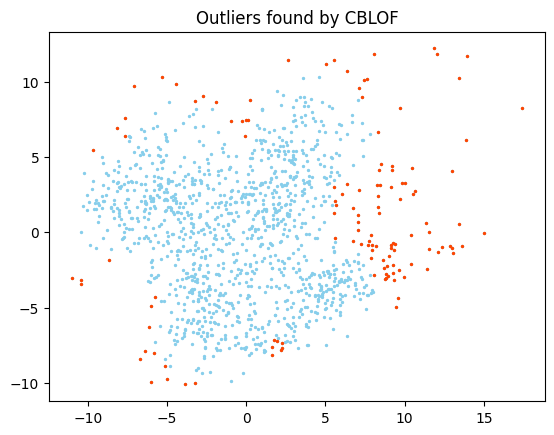

In [ ]:

anomalies_isol = where(outliers_cblof==1)
anomalies_isol = X_train_pca[anomalies_isol]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='orangered', s=2)
plt.title("Outliers found by CBLOF")
plt.show()

##ABOD

In [ ]:
from pyod.models.abod import ABOD

In [ ]:
abod=ABOD(n_neighbors=20)
abod.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=20)

In [ ]:
abod.threshold_

-9.245383122545631e-07

In [ ]:
abod.decision_scores_

array([-3.57261797e-08, -3.15246271e-06, -6.38201417e-06, ...,
       -2.26572192e-06, -3.36971844e-06, -2.81909748e-06])

In [ ]:
outliers_abod=abod.predict(X)
np.unique(outliers_abod, return_counts=True)

(array([0, 1]), array([1591,  237]))

AttributeError: ignored

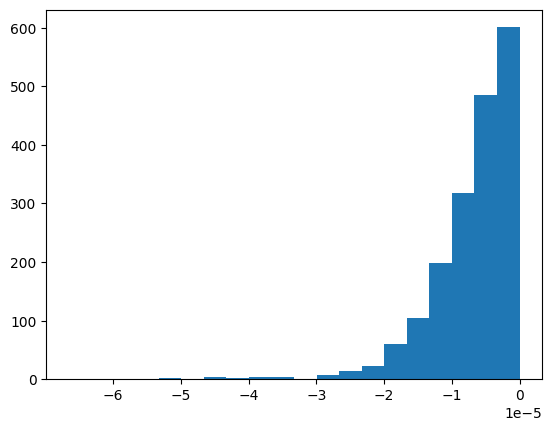

In [ ]:
plt.hist(abod.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_abod==1)]), c='k')
plt.show()

In [ ]:
np.mean(abod.decision_scores_[np.where(outliers_abod==0)])

-7.798436529689516e-06

AttributeError: ignored

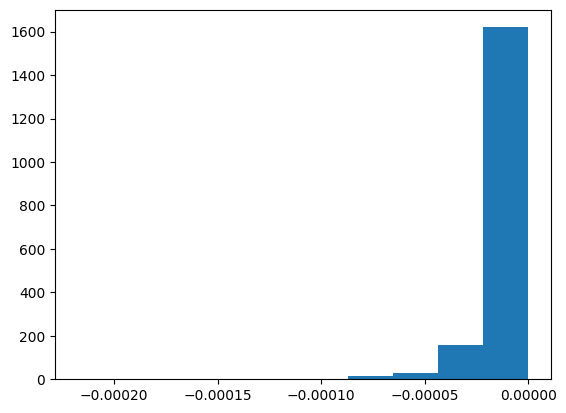

In [ ]:
plt.hist(abod.decision_scores_)# bin=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_abod==1)]),c="k")
plt.show()

##LODA

In [ ]:
from pyod.models.loda import LODA

In [ ]:
clf=LODA()
clf.fit(X)

LODA(contamination=0.1, n_bins=10, n_random_cuts=100)

In [ ]:
outliers_loda=clf.predict(X)
np.unique(outliers_loda, return_counts=True)

(array([0, 1]), array([1645,  183]))

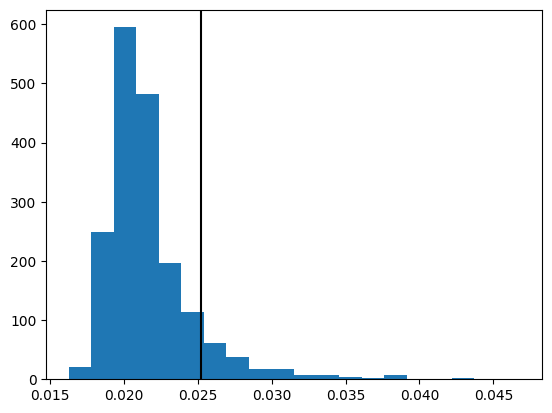

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_loda==1)]), c='k')
plt.show()

#Il comando successivo "plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')"
# aggiunge una linea verticale sull'istogramma che rappresenta il valore
#minimo dei punteggi di decisione dei campioni che sono stati identificati
# come "outlier" dal classificatore. Il parametro "c='k'" imposta il colore
# della linea su nero.

##ISOLATION FOREST

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf=IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()


ValueError: ignored

In [ ]:
outliers_isolfor=clf.predict(y_test)
outliers_isolfor = outliers_isolfor.reshape(-1, 1)
np.unique(outliers_isolfor, return_counts=True)

ValueError: ignored

NameError: ignored

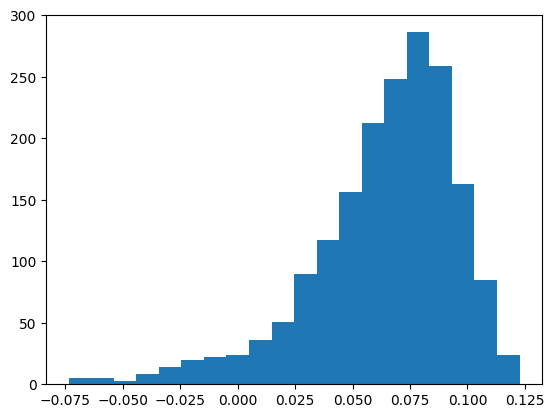

In [ ]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers_isolfor==1)]), c='k')
plt.show()

##VALUTAZIONE DEL MIGLIOR ALGORITMO DI ANOMALY

In [ ]:
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Carica i dati di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crea un'istanza dei modelli di anomaly detection
lof = LocalOutlierFactor(novelty=True)
knn = KNeighborsClassifier(n_neighbors=5)
isf = IsolationForest()

# Addestra i modelli sui dati di addestramento
lof.fit(X_train)
knn.fit(X_train, y_train)
isf.fit(X_train)

# Utilizza i modelli per predire le anomalie nei dati di test
lof_preds = lof.predict(X_test)
knn_preds = knn.predict(X_test)
isf_preds = isf.predict(X_test)

# Calcola la precision, il recall e l'F1 score per ogni algoritmo
lof_precision = precision_score(y_test, lof_preds, average="macro")
lof_recall = recall_score(y_test, lof_preds, average="macro")
lof_f1 = f1_score(y_test, lof_preds, average="macro")

knn_precision = precision_score(y_test, knn_preds, average="macro")
knn_recall = recall_score(y_test, knn_preds,average="macro")
knn_f1 = f1_score(y_test, knn_preds,average="macro")

isf_precision = precision_score(y_test, isf_preds, average="macro")
isf_recall = recall_score(y_test, isf_preds, average="macro")
isf_f1 = f1_score(y_test, isf_preds, average="macro")

# Stampa i risultati delle metriche per ogni algoritmo
print("LOF:")
print("Precision:", lof_precision)
print("Recall:", lof_recall)
print("F1 Score:", lof_f1)

print("kNN:")
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

print("Isolation Forest:")
print("Precision:", isf_precision)
print("Recall:", isf_recall)
print("F1 Score:", isf_f1)


LOF:
Precision: 0.020172910662824207
Recall: 0.1111111111111111
F1 Score: 0.03414634146341464
kNN:
Precision: 0.4669460523374254
Recall: 0.4334062321268851
F1 Score: 0.43661885658602456
Isolation Forest:
Precision: 0.019082794706063402
Recall: 0.10934744268077601
F1 Score: 0.03249475890985325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [ ]:
X_train_sel

array([[ 1.9656893 , -0.0725958 ,  2.20468716, ..., -0.19460009,
         0.99088124,  1.03817925],
       [-2.16405928,  2.34518409,  0.31612976, ...,  2.16582305,
        -0.49054578, -0.32049504],
       [-0.46458339, -0.26725369, -1.3637611 , ...,  2.09463662,
        -1.11326502, -0.74304819],
       ...,
       [-0.17393038,  0.04512426, -0.82618082, ..., -0.16521739,
        -0.22555306,  0.24925306],
       [-1.61828624,  1.81143454, -0.1520389 , ..., -0.52406335,
        -0.73823545, -0.2560368 ],
       [-1.06202849,  0.76755738, -0.96146715, ...,  0.7640549 ,
        -1.17283564, -0.4116171 ]])

In [ ]:
hbosdataframe=pd.DataFrame(outliers_hbos)
print(hbosdataframe)

ellipticdataframe=pd.DataFrame(outliers_ellenv)
print(ellipticdataframe)


cblofdataframe=pd.DataFrame(outliers_cblof)
print(cblofdataframe)

      0
0     1
1     0
2     0
3     0
4     0
...  ..
1823  0
1824  0
1825  0
1826  0
1827  0

[1828 rows x 1 columns]
      0
0     1
1     1
2     1
3     1
4     1
...  ..
1823  1
1824  1
1825  1
1826  1
1827  1

[1828 rows x 1 columns]
      0
0     1
1     0
2     0
3     0
4     0
...  ..
1823  0
1824  0
1825  0
1826  0
1827  0

[1828 rows x 1 columns]


In [ ]:
knndataframe=pd.DataFrame(outliers_knn)
print(knndataframe)

lofdataframe=pd.DataFrame(y_pred)
print(lofdataframe)

cofdataframe=pd.DataFrame(outliers_cof)
print(cofdataframe)


      0
0     1
1     0
2     0
3     0
4     0
...  ..
1823  0
1824  0
1825  0
1826  0
1827  0

[1828 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
544  1
545  1
546  1
547  1
548  1

[549 rows x 1 columns]
      0
0     1
1     1
2     0
3     0
4     0
...  ..
1823  0
1824  0
1825  0
1826  0
1827  0

[1828 rows x 1 columns]


In [ ]:
# Esegue l'intersezione dei tre dataframe
intersezione = pd.merge(pd.merge(hbosdataframe, ellipticdataframe, how='inner'), cblofdataframe, how='inner')

# Stampa il risultato
print(intersezione)


          0
0         1
1         1
2         1
3         1
4         1
...      ..
55089400  1
55089401  1
55089402  1
55089403  1
55089404  1

[55089405 rows x 1 columns]


In [ ]:
# Esegue l'intersezione delle colonne dei tre dataframe
intersezione_colonne = list(hbosdataframe.columns.intersection(ellipticdataframe.columns).intersection(cblofdataframe.columns))

# Stampa le colonne di intersezione
print(intersezione_colonne)


[0]


In [ ]:
# Esegue l'intersezione delle colonne dei tre dataframe
intersezione_colonne = list(cofdataframe.columns.intersection(lofdataframe.columns))

# Stampa le colonne di intersezione
print(intersezione_colonne)

[0]


## RIPRODUCIAMO GLI OUTLIERS


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
ellenv = EllipticEnvelope(random_state=0)
ellenv.fit(X_train_pca)

EllipticEnvelope(random_state=0)

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
outliers_ellenv = ellenv.predict(X_train_pca)

In [ ]:
np.unique(outliers_ellenv, return_counts=True)

(array([-1,  1]), array([ 128, 1151]))

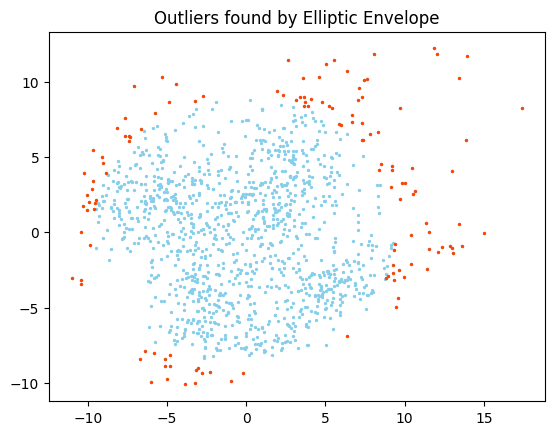

In [ ]:
anomalies_ellenv = where(outliers_ellenv==-1)
anomalies_ellenv = X_train_pca[anomalies_ellenv]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_ellenv[:,0], anomalies_ellenv[:,1], color='orangered', s=2)
plt.title("Outliers found by Elliptic Envelope")
plt.show()

In [ ]:
from pyod.models.cblof import CBLOF

In [ ]:
clf = CBLOF()  # problem with my KMeans does not run
clf.fit(X_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [ ]:
outliers_cblof = clf.predict(X_train_pca)
np.unique(outliers_cblof, return_counts=True)

(array([0, 1]), array([1181,   98]))

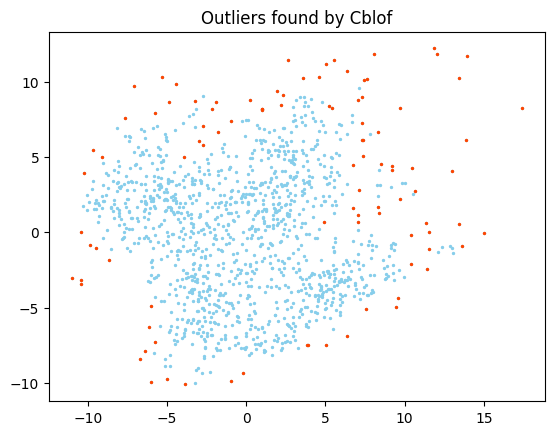

In [ ]:
anomalies_cblof = where(outliers_cblof==1)
anomalies_cblof = X_train_pca[anomalies_cblof]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_cblof[:,0], anomalies_cblof[:,1], color='orangered', s=2)
plt.title("Outliers found by Cblof")
plt.show()

In [ ]:
clf = KNN(n_neighbors=5)
clf.fit(X_train_pca)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
outliers_knn = clf.predict(X_train_pca)
np.unique(outliers_knn, return_counts=True)

(array([0, 1]), array([1181,   98]))

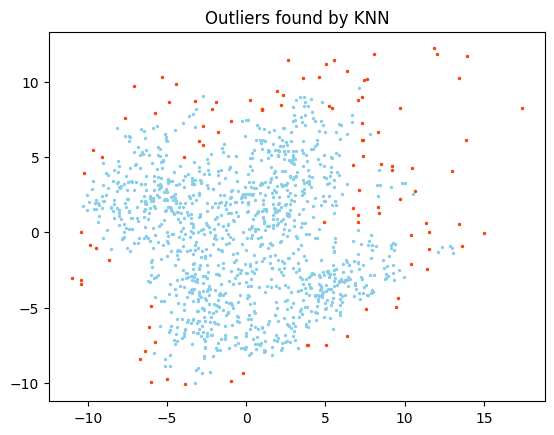

In [ ]:
anomalies_knn= where(outliers_knn==1)
anomalies_knn = X_train_pca[anomalies_knn]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_knn[:,0], anomalies_knn[:,1], color='orangered', s=2)
plt.title("Outliers found by KNN")
plt.show()

In [ ]:
# outliers_final_dbscan = where(dbscan.labels_ == -1)
outliers_final_hbos = where(outliers_cblof == 1)
outliers_final_isol = where(outliers_knn == -1)
outliers_final_abd = where(outliers_ellenv == -1)


tot = []
for x in outliers_final_hbos:
    tot.extend(x)
for x in outliers_final_isol:
    tot.extend(x)
for x in outliers_final_abd:
    tot.extend(x)

print(tot)

len(tot)

[0, 1, 12, 23, 40, 93, 94, 102, 107, 127, 136, 153, 174, 175, 187, 204, 206, 209, 210, 229, 230, 262, 271, 294, 313, 315, 317, 322, 330, 342, 383, 412, 415, 416, 427, 436, 439, 441, 452, 506, 530, 551, 564, 571, 597, 601, 606, 611, 620, 623, 638, 640, 676, 699, 706, 710, 738, 742, 758, 789, 810, 812, 822, 834, 837, 850, 855, 899, 910, 912, 917, 945, 961, 968, 972, 980, 981, 987, 1001, 1027, 1030, 1063, 1071, 1075, 1086, 1100, 1147, 1161, 1167, 1182, 1203, 1211, 1247, 1248, 1251, 1252, 1256, 1276, 0, 1, 21, 23, 40, 51, 83, 92, 93, 96, 102, 107, 127, 153, 175, 187, 192, 204, 206, 209, 210, 211, 248, 271, 276, 303, 317, 322, 330, 358, 372, 373, 399, 415, 422, 427, 435, 436, 441, 444, 452, 476, 506, 530, 564, 570, 606, 611, 620, 623, 629, 638, 642, 672, 676, 691, 694, 699, 704, 706, 710, 738, 739, 742, 746, 754, 758, 769, 785, 786, 789, 792, 802, 810, 812, 834, 837, 845, 855, 893, 899, 908, 910, 912, 941, 944, 945, 963, 966, 968, 972, 980, 987, 1001, 1002, 1009, 1016, 1027, 1065, 1071, 107

226

In [ ]:
#I look for all the values that appear in the outliers list more than once and insert them into a list and then transform it into an array
listadoppi = []
import collections
for item, count in collections.Counter(tot).items():
    if count > 2:
        listadoppi.append(item)
print(listadoppi)
finale_out = np.array(listadoppi)

anomalies_final = X_train.iloc[finale_out]
print(len(anomalies_final))

In [ ]:
anomalies_final = X_train_pca[finale_out]
print(len(anomalies_final))

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_final[:,0], anomalies_final[:,1], color='orangered', s=2)
plt.title("Outliers found by at least 3/4 methods")
plt.show()

In [ ]:
df_wo_outliers = X_train.copy()
df_wo_outliers.drop(finale_out, inplace=True)
df_wo_outliers.describe().T

In [ ]:
y_train = y_train.ravel()

In [ ]:
type(y_train2)

In [ ]:
y_train2 = np.delete(y_train2, finale_out)

In [ ]:
y_train2 = lb.fit_transform(y_train2)

In [ ]:
pca = PCA(n_components=2)
X_train_pca2 = pca.fit_transform(X_train2)
X_train_pca2.shape

In [ ]:
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], color='skyblue', s=2)
plt.title("Outliers Removed")
plt.show()